# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
# Your work here.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('C:/Users/jho/Downloads/1509032434_human_temp/human_temp/data/human_body_temperature.csv')

our null hypothesis will be that the mean of human body temperatures in our sample will be equal to 98.6 degrees farenheit.

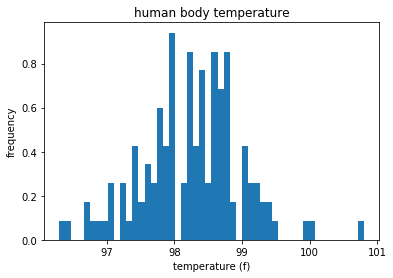

In [6]:
# 1.

temperature = df['temperature']
#print(temperature.head())

plt.hist(temperature, normed=True, bins=50)
plt.xlabel('temperature (f)')
plt.ylabel('frequency')
plt.title('human body temperature')
plt.show()

from the plot above, the data seems to be normally distrubuted for a sample of 130 but it is not perfect.

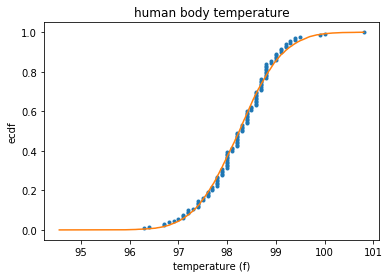

In [24]:
x, y = ecdf(temperature)

temp_theor = np.random.normal(np.mean(temperature), np.std(temperature), 10000)
x_theor, y_theor = ecdf(temp_theor)

plt.plot(x, y, marker='.', linestyle='none')
plt.plot(x_theor, y_theor)
plt.xlabel('temperature (f)')
plt.ylabel('ecdf')
plt.title('human body temperature')
plt.show()

based on the ecdf, the sample seems to follow a normal distribution.

In [54]:
# 2.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


the sample size is large enough (>30) for the central limit theorem. the results would display better results if the size were something like 500 or more observations, however.
the observations are independent of one another.

In [14]:
# 3.

df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


the true mean of the temperature of the sample is 98.2492 degrees.
this is off from the expected mean by about 0.35 degrees.

i would use a one sample test because each observation is independent of one another.



In [16]:
bs_replicates = np.empty(10000)

size = len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(temperature, len(temperature))
    bs_replicates[i] = np.mean(bs_sample)
    
p = np.sum(bs_replicates >= 98.6) / size

print('p-value: ', p)

p-value:  0.0


a small p-value (here, zero) suggests that the true mean of human body temperature is statistically different from the expected mean temperature, 98.6 degrees.

in this situation, it is best to use a z-statistic because the sample is larger than 30.

In [29]:
# calculate the z-score

z = (np.mean(temperature) - 98.6) / ((np.std(temperature)) / np.sqrt(len(temperature)))
print('z = ', z)

pz = stats.norm.sf(abs(z))
print(pz)

z =  -5.47592520208
2.17615758294e-08


with a z-score having an absolute value of 5.4759, this can be interpreted by the number of standard deviations away from the mean. with over 5 standard deviations away from the mean, we can conclude that the true mean of human body temperature is significantly different than the expected value, 98.6. we can support this with a small p-value.

the results are different from each other because we approached the problem in two different ways. a small p-value means we can reject the null hypothesis that the mean of human body temperature is 98.6. a large absolute z-score value suggests a statistically significant difference in means of human body temperature.

In [44]:
# 4.

sample = np.random.choice(temperature, 10)
print(sample)

[ 98.6  98.2  97.6  97.7  99.2  97.6  98.   97.6  98.6  97.1]


In [45]:
t = (np.mean(sample) - 98.6) / ((np.std(sample)) / np.sqrt(len(sample)))

p_sample_t = stats.t.sf(abs(t), 10)

print(p_sample_t)

0.0059496652406


In [47]:
z = (np.mean(sample) - 98.6) / ((np.std(sample)) / np.sqrt(len(sample)))

p_sample_z = stats.norm.sf(abs(z), 10)

print(p_sample_z)

0.999999999998


the p-values for the t statistic and z statistic are much different. t-statistics should be used with small sample sizes while z-statistics should be used with larger sample sizes with a more normal distribution. 

the correct measurement to use here is the t-statistic. since it is small, we can reject the null hypothesis that the mean of the sample human body temperature is equal to 98.6.

In [ ]:
# 5.

a z-score of 1.96 is the value for a 95% confidence interval.

error can be calculated by multiplying the z-score value by (standard deviation / square root of the sample size).

In [13]:
z = 1.96
error = z * (np.std(temperature)/np.sqrt(len(temperature)))
print(error)

0.125550964803


our error value of 0.1256 suggests that the human body temperature can be estimated with 95% confidence between 98.2492 + or - 0.1256, which would be [98.1236, 98.3748].

confidence interval for the perceived mean normal body temperature 98.6 degrees farenheit.

In [14]:
confidence_interval_95 = np.percentile(temperature, [2.5, 97.5])
print(confidence_interval_95)

[ 96.7225  99.4775]


the 95% confidence interval of our mean of 98.6 degrees farenheit lies between 96.7225 and 99.4775 degrees farenheit. an 'abnormal' temperature would be any temperature outside of [96.7225, 99.4775].

In [16]:
# 6.

males = df[df['gender'] == 'M']['temperature']
males
females = df[df['gender'] == 'F']['temperature']
females

0       99.3
1       98.4
3       99.2
4       98.0
8       98.4
9       98.6
10      98.8
11      96.7
13      98.7
14      97.8
15      98.8
16      98.3
18      97.2
20      98.3
25      98.0
26      97.8
27      98.2
28      98.4
31      97.6
38      97.9
39      96.4
40      98.4
44      99.0
45      97.9
50      98.9
51      98.3
52      98.5
54      98.2
55      98.6
56      98.8
       ...  
68      98.7
70      98.1
71      97.7
76      98.0
80      98.8
83      99.2
84      98.6
86      98.6
91     100.0
92      98.8
95      96.8
96      99.9
97      98.7
98      98.8
102     98.0
103     99.4
108     98.7
110     98.8
111     98.0
112     98.2
113     99.1
116    100.8
117     97.8
119     98.4
120     97.7
121     97.9
122     99.0
123     97.2
127     98.2
129     98.7
Name: temperature, Length: 65, dtype: float64

we can test a null hypothesis that males and females do not have a significant difference in body temperature.

In [19]:
difference = abs(diff_of_means(males, females))
print('difference between males and females average body temperature =', difference)

difference between males and females average body temperature = 0.289230769230727


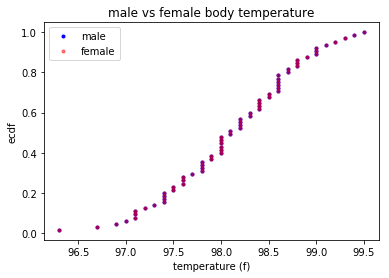

In [27]:
x_male, y_male = ecdf(males)
x_female, y_female = ecdf(males)

plt.plot(x_male, y_male, marker='.', linestyle='none', color='blue')
plt.plot(x_female, y_female, marker='.', linestyle='none', color='red', alpha=0.5)
plt.xlabel('temperature (f)')
plt.ylabel('ecdf')
plt.legend(('male', 'female'), loc='best')
plt.title('male vs female body temperature')
plt.show()

based on the ecdf, the data points nearly overlap. we should confirm if there is a significant difference by calculating the p-value. this can be done with permutation sampling.

In [33]:
perm_replicates = np.empty(10000)
size = len(perm_replicates)
males_and_females = np.concatenate((males, females))

for i in range(size):
    perm_sample = np.random.permutation(males_and_females)
    male_perm = perm_sample[:len(males)]
    female_perm = perm_sample[len(males):]
    perm_replicates[i] = abs(np.mean(male_perm) - np.mean(female_perm))

p = np.sum(perm_replicates >= difference)/len(perm_replicates)

print('p = ', p)

p =  0.0247


since the p-value is small (2 * p < 0.05 for two tailed test), we can reject our null hypothesis. therefore, males and females have statistically different mean body temperatures.  

In [17]:
# these functions may come in handy later

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):

    bs_sample = np.random.choice(data, len(data))

    return func(bs_sample)

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff